# Compte rendu      $\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$      Mohamed_Issa 

# Objectif

On se propose dans ce TP de déterminer dans un premier temps,et à partir de la valeur de chaque résistance,la température à l’intérieur du four, et en particulier la température de l’objet mis à cuire. Cette première approche est appelée problème direct.

Mais en réalité et dans la pratique, le problème inverse consiste à déterminer les valeurs minimales des résistances, considérées comme inconnues, qui donnent une température idéale au cuisson. C’est l’objet de la deuxième partie du travail.




## Position du problème

On s'intéresse dans ce TP au **problème direct** qui à partir de la valeur de chaque résistance, on détèrmine la température à l’intérieur du four, et en particulier la température de l’objet mis à cuire.
Le système d'équations $(1)$ qui régit la variation spatio-temporelle de la température dans le domaine $Ω$ est:
$$
(1)
\begin{cases}
\frac{\partial T}{\partial t} - div(\kappa \nabla T)(x,t)=f(x), \forall x \in Ω, t\geqslant0  ,\\
T=T_{b},sur\, \Gamma_{1},\\
T=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial T}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},\\
T(x,0)=T_{0}(x), \forall x \in Ω,
\end{cases}
$$
où $\kappa$ désigne la conductivité thermique, qui est  ́egale à κa dans l’air Ωa et κc dans la piéce
à chauffer $Ω_{c}$, et $f$ repésente la source surfacique de chaleur produite par les différentes
résistances.
En effet, le problème $(1)$ se décompose en deux sous problèmes:

-Un problème stationnaire:
$$
(2)
\begin{cases}
- div(\kappa \nabla T_{st})=f, dans\, Ω,\\
T_{st}=T_{b},sur\, \Gamma_{1},\\
T_{st}=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial T_{st}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
-Un problème transitoire:
$$
(3)
\begin{cases}
\frac{\partial T_{tr}}{\partial t} - div(\kappa \nabla T_{tr})(x,t)=0, \forall x \in Ω, t\geqslant0  ,\\
T_{tr}=0,sur\, \Gamma_{1}\cup\Gamma_{3},\\
\kappa \frac{\partial T_{tr}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},\\
T_{tr}(x,0)=T_{0}(x)-T_{st}(x), \forall x \in Ω,
\end{cases}
$$

## Différentes parties 

I-Importation des modules

II-Déclaration des variables du problème

III-Exercice $1$ Page $4$

IV-Exercice $2$ Page $5$

V-Exercice $3$ Page $7$

VI-Exercice $4$ Page $8$

VII-Etude de consistance-stabilité-convergence du schéma numérique stationnaire

IIX-Exercice $5$ Page $9$

IX-Exercice $6$ Page $10$

X-Exercice $7$ Page $11$

XI-Exercice $8$ Page $12$


### I.Importation des modules 

In [301]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import matplotlib
from math import *
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

### II.Déclaration des variables 

In [328]:
Tb=50                                #Temérature sur Γ1
Th=100                               #Temérature sur Γ3 
Lx=2                                 #longueur du côté suivant x de Ω
Ly=1                                 #longueur du côté suivant y de Ω
nx=15                                #paramètre de discrétisation suivant x
ny=15                                #paramètre de discrétisation suivant y
M=150                                #paramètre de discrétisation temporel
hx=Lx/(4*nx)                         #pas de discrétisation suivant x 
hy=Ly/(4*ny)                         #pas de discrétisation suivant y 
ka=1                                 #conduction thermique du matériau Ωa 
kc=10                                #conduction thermique du matériau Ωc
Tm=0.01                              #temps maximal
deltat=Tm/M                          #pas de discrétisation temporel
Nx=4*nx + 1                          
Ny=4*ny-1
N=Nx*Ny
alpha=2/(hx**2)+2/(hy**2)
beta=1/(hx**2)
delta=1/(hy**2)
betaa=ka*beta
betac=kc*beta
deltaa=ka*delta
deltac=kc*delta
alpha0=betaa+2*deltaa
alphaa=ka*alpha
alphac=kc*alpha
alphaac=(betaa+betac+2*deltaa)
alphaca=(deltaa+deltac+2*betaa)     
deltat=Tm/M

### III.Exercice 1 Page 4

#### Question 1 page 4
On veut montrer que $T(x,t) =T_{st}(x) + T_{tr}(x,t)$ est solution du problème $(1)$ avec $T_{st}$ et $T_{tr}$ les solutions respectives des systèmes $(2)$ et $(3)$.
Il suffit de remplacer $T_{st}$ et $T_{tr}$ dans les systèmes $(2)$ et $(3)$ et effectuer la somme en utilisant la linéarité des opérateurs différentiels pour obtenir:
$$
\begin{cases}
\frac{\partial (T_{st}+T_{tr})}{\partial t} - div(\kappa \nabla (T_{st}+T_{tr}))(x,t)=f(x), \forall x \in Ω, t\geqslant0  ,\\
T_{st}+T_{tr}=T_{b},sur\, \Gamma_{1},\\
T_{st}+T_{tr}=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial T}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},\\
T_{st}+T_{tr}(x,0)=T_{0}(x), \forall x \in Ω,
\end{cases}
$$
ce qui est équivalent au système $(1)$ avec $T(x,t) =T_{st}(x) + T_{tr}(x,t)$.

#### Question 2 page 4
##### -Solution du système stationnaire
Dans cette partie la valeur de $f$ est prise égale à $0$. 

On cherche à déterminer les solutions exactes des problèmes $(2)$ et $(3)$ en absence de la pièce $Ω_{c}$ (c-à-d $\kappa_{c}=\kappa_{a} \,dans \,Ω$).

Pour le système $(2)$ Le système à résoudre revient à:

$$
(2)
\begin{cases}
\Delta T_{st}=0, dans\, Ω,\\
T_{st}=T_{b},sur\, \Gamma_{1},\\
T_{st}=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial T_{st}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$

A priori $T$ ne dépend que de $x$ et $y$. Avec les conditions aux limites imposées sur $Γ1$ ($T$=$T_{b}$) et $Γ3$ ($T$=$T_{h}$) on déduit que la température $T$ ne va dépendre que de la composante $y$.

Par conséquent: $\Delta T_{st} \Leftrightarrow \frac{\partial^2 T_{st}}{\partial y^2}$ c-à-d que $T$ s'exprime linéairement en fonction de $y$. Les constantes d'intégration sont déterminées par les conditions aux limites $T_{b} et T_{h}$.

On obtient finalement l'expression de $T_{st}$:

$T_{st}=\frac{T_{h}-T_{b}}{Ly}y+T_{b}$

On donne dans le code ci-dessous la fonction qui permet de calculer la solution exacte $T_{st}$.

##### -Solution du système transitoire
Dans cette partie on se propose de résoudre le système:

$$
(3)
\begin{cases}
\frac{\partial T_{tr}}{\partial t} - div(\kappa \nabla T_{tr})(x,t)=0, \forall x \in Ω, t\geqslant0  ,\\
T_{tr}=0,sur\, \Gamma_{1}\cup\Gamma_{3},\\
\kappa \frac{\partial T_{tr}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},\\
T_{tr}(x,0)=T_{0}(x)-T_{st}(x), \forall x \in Ω,
\end{cases}
$$
La température T_{tr} ne dépend ici que de la variable $y$ vu les conditions aux limites imposées sur les parois $\Gamma_{1}$ et $\Gamma_{3}$.

Pour résoudre le problème $(3)$, on utilise la méthode de la séparation des variables: On écrit $T_{tr}(y,t)$ sous la forme:

$T_{tr}(y,t)=\Phi(y) \Psi(t)$

En remplaçant $T_{tr}(y,t)$ dans le système $(3)$ on obtient:

$$
\begin{array}{ccl}
\Phi(y)\Psi'(t)-\kappa \Psi(t)\frac{\partial^2 \Phi}{\partial y^2}(y)=0 & \Leftrightarrow & \frac{1}{\kappa}\frac{\Psi'}{\Psi}- \frac{\frac{\partial^2 \Phi}{\partial y^2}}{\Phi}(y)=0 \\
                                               & \Leftrightarrow & \exists \, \text{une constante} \, \lambda \, / \frac{1}{\kappa}\frac{\Psi'}{\Psi}= \frac{\frac{\partial^2 \Phi}{\partial y^2}}{\Phi}(y)=- \lambda
\end{array}
$$
On obtient ainsi le système des deux équations:

$$
\begin{cases}
\Psi'(t)=- \lambda\kappa\Psi(t) \\
\frac{\partial^2 \Phi}{\partial y^2}=- \lambda\Phi
\end{cases}
$$

$Si$ $\lambda <0$:

$\exists$ deux constantes $B$ et $C$ tel que: $\Phi(y)=Be^{\sqrt{-\lambda}y}+Ce^{-\sqrt{-\lambda}y}$

Les conditions aux limites sur les parois $\Gamma_{1}$ et $\Gamma_{3}$ $(\Phi(0)=\Phi(L_y)=0)$ donne une solution nulle. Donc $\lambda$ ne peut pas être négative.

$Si$ $\lambda =0$:

$\exists$ deux constantes $B$ et $C$ tel que $\Phi$ s'exprime linéairement en fonction de $y$ sous la forme: $\Phi(y)=By+C$.

De même, les conditions aux limites sur les parois $\Gamma_{1}$ et $\Gamma_{3}$ $(\Phi(0)=\Phi(L_y)=0)$ donne une solution nulle. Donc $\lambda$ ne peut pas être nulle.

Pour cela $\lambda$ ne peut être que positif. Les solutions de notre système s'écrivent avec $3$ constantes $A,B$ et $C$ sous la forme:

$$
\begin{cases}
\Psi(t)=A\exp(-\lambda\kappa t)\\
\Phi(y)=B \sin(\sqrt{\lambda}y)+C\cos(\sqrt{\lambda}y)
\end{cases}
$$

La condition aux limites annulent la constante $C$ et donnent une expression de $\lambda$ en fonction des entiers $n$ sous la forme:  

$\sqrt{\lambda}= n \frac{\pi}{L_y}$

Vu la linéarité de notre système, la combinaison linéaire de tous les solutions correspondantes aux différentes valeurs des enties $n$ donnent encore une solution.

La solution générale s'écrit alors:

$T_{tr}(y,t)= \sum_{n=1}^{+\infty}D_{n}\sin(\frac{n\pi y}{L_{y}})e^{-\frac{n^{2}\pi^{2}\kappa t}{L_{y}^{2}}} $

La valeur de la condition initiale donne:

$T_{tr}(y,0)=T_{0}-T_{st}(y)=\sum_{n=1}^{+\infty}D_{n}\sin(\frac{n\pi y}{L_{y}})$

On reconnait un développement en série de Fourier, ce qui donne la valeur des coefficients:

$D_{n}= \frac{2}{L_{y}} \int_{0}^{L_{y}}(T_{0}-T_{st}(y))\sin(\frac{n\pi y}{L_{y}})dy$

In [303]:
#________________________Fonction qui retourne la solution exacte______________________________#

def sol_exacte(A,F,Tb,Th):
    phi_m = [i*hx for i in range(4*nx + 1)]
    phi_p = [i*hy for i in range(4*ny + 1)]
    X,Y=np.meshgrid(phi_m, phi_p)
    T=(Th-Tb)/Ly*Y+Tb
    return T

### IV.Exercice 2 Page 5

#### Question 1 page 5
On veut montrer que $T_{st}(x) = T_{st}^{0}(x)+T_{st}^{r}(x)$ est solution de $(2)$ avec $T_{st}^{0}(x)$ est solution de $(2)$ pour $f=0$ et $T_{st}^{r}(x)$ est solution de $(2)$ pour $T_{b}=T_{h}=0$.

En effet $T_{st}^{0}$ vérifie:
$$
\begin{cases}
- div(\kappa \nabla T_{st}^{0})=0, dans\, Ω,\\
T_{st}^{0}=T_{b},sur\, \Gamma_{1},\\
T_{st}^{0}=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial T_{st}^{0}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
et $T_{st}^{r}$ vérifie :
$$
\begin{cases}
- div(\kappa \nabla T_{st}^{r})=f, dans\, Ω,\\
T_{st}^{r}=0,sur\, \Gamma_{1},\\
T_{st}^{r}=0,sur\, \Gamma_{3},\\
\kappa \frac{\partial T_{st}^{r}}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
En effectuant la somme entre les deux systèmes ci-dessus en utilisant la linéarité des opérateurs différentiels on obtient:
$$
\begin{cases}
- div(\kappa \nabla (T_{st}^{0}+T_{st}^{r}))=f, dans\, Ω,\\
T_{st}^{0}+T_{st}^{r}=T_{b},sur\, \Gamma_{1},\\
T_{st}^{0}+T_{st}^{r}=T_{h},sur\, \Gamma_{3},\\
\kappa \frac{\partial (T_{st}^{0}+T_{st}^{r})}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
Ce qui est équivalent à dire que $T_{st}(x) = T_{st}^{0}(x)+T_{st}^{r}(x)$ est solution de $(2)$.

#### Question 2 page 5
Avec les conditions $T_{b}=T_{h}=0$ montrons que si $T$ est solution de $(2)$ pour une valeur de $f$ donnée, alors pour un scalaire $\alpha$ on aura $\alpha T$ solution de $(2)$ pour la valeur de $\alpha f$.
En effet $T$ vérifie :
$$
\begin{cases}
- div(\kappa \nabla T)=f, dans\, Ω,\\
T=0,sur\, \Gamma_{1},\\
T=0,sur\, \Gamma_{3},\\
\kappa \frac{\partial T}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
en multipliant par $\alpha$ et en utilisant la linéarité des opérateurs différentiels on aura:
$$
\begin{cases}
- div(\kappa \nabla(\alpha T))=\alpha f, dans\, Ω,\\
\alpha T=0,sur\, \Gamma_{1},\\
\alpha T=0,sur\, \Gamma_{3},\\
\kappa \frac{\partial(\alpha T)}{\partial n}=0,sur\, \Gamma_{2}\cup\Gamma_{4},
\end{cases}
$$
D'où $\alpha T$ solution de $(2)$ pour la valeur de $\alpha f$.

### V.Exercice 3 page 7

#### Question 1 page 7
Le domaine $Ω=Ω_{a}\cupΩ_{c}$ peut être découpé en différentes zones tel que $Ω=\Gamma_{1}\cup Z_{1}\cup Z_{2}\cup Z_{3}\cup Z_{4}\cup\Gamma_{3}$ avec:

$Z1 = \{(x_{i},y_{j}) \in Ω \, / \, j \in [1,n_{y}-1]\cup [3 n_{y}+1,4 n_{y}-1]\}$

$Z2 = \{(x_{i},y_{j}) \in Ω \, / \, j \in [n_{y}+1,3 n_{y}-1]\}$

$Z3 = \{(x_{i},y_{j}) \in Ω \, / \, j =n_{y}\}$

$Z4 = \{(x_{i},y_{j}) \in Ω \, / \, j =3 n_{y}\}$

La formulation matricielle de la zone $Z1$ et $\Gamma_{1}$est donnée par:

$ B_{1}T_{j-1} + A_{1}T_{j} + B_{1}T_{j+1} = 0_{\mathbb{R}^{N_{x}}}, ~ si ~ j \notin \{1,4 n_{y} -1\}$

$ A_{1}T_{1} + B_{1}T_{2} =F_{1}, ~si~ j=1$

$ B_{1}T_{4 n_{y}-2} + A_{1}T_{4 n_{y}-1}=F_{4 n_{y}-1}, ~si~ j=4 n_{y}-1$

La formulation matricielle de la zone $Z2$ est donnée par:

$ B_{2}T_{j-1} + A_{2}T_{j} + B_{2}T_{j+1} = 0_{\mathbb{R}^{N_{x}}}$

La formulation matricielle de la zone $Z3$ est donnée par:

$ B_{1}T_{n_{y}-1} + A_{3}T_{n_{y}} + B_{2}T_{n_{y}+1} = 0_{\mathbb{R}^{N_{x}}}$

La formulation matricielle de la zone $Z4$ est donnée par:

$ B_{2}T_{3 n_{y}-1} + A_{3}T_{3 n_{y}} + B_{1}T_{3 n_{y}+1} = 0_{\mathbb{R}^{N_{x}}}$

De cette manière on construit les blocs de la matrice $A$ correspondante au problème linéaire $AT=F$.
La matrice $A$ déduite est une matrice trigonale par blocs qui s'écrit sous la forme:


\begin{equation*}
A=
\begin{pmatrix}
A_{1} & B_{1} & 0 & \cdots & \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots & 0 \\
B_{1} & A_{1}  & B_{1} & \ddots &&&&&&&&& \vdots \\
0  & \ddots  & \ddots & \ddots  & \ddots   &&&&&&&& \vdots \\
\vdots & \ddots & B_{1} & A_{1}  &B_{1} &\ddots  &&&&&&& \vdots\\
\vdots && \ddots & B_{1} &A_{3} & B_{2} & \ddots &&&&&& \vdots  \\
\vdots &&& \ddots & B_{2} & A_{2} & B_{2} &\ddots &&&&&\vdots\\
\vdots &&&& \ddots & \ddots & \ddots & \ddots & \ddots &&&& \vdots\\
\vdots &&&&& \ddots & B_{2} & A_{2} & B_{2}  &\ddots &&& \vdots\\ 
\vdots &&&&&& \ddots & B_{2} &A_{3}  & B_{1} &\ddots & &\vdots\\
\vdots &&&&&&& \ddots &  B_{1}  & A_{1} & B_{1} &\ddots &0\\
\vdots &&&&&&&& \ddots & \ddots &\ddots  & \ddots  &0\\
\vdots &&&&&&&&& \ddots & B_{1} & A_{1} &B_{1}\\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots &  \cdots  & \cdots & 0 & B_{1} & A_{1} \\
\end{pmatrix}
\end{equation*}

La matrice $F$ est donnée par:
\begin{equation*}
F=
\begin{pmatrix}
-T_{b}B_{1}\\
0\\
\vdots\\
0\\
-T_{h}B_{1}\\
\end{pmatrix}
\end{equation*}




#### Question 2 page 7

In [304]:
#________________________Construction des matrices blocs de A______________________________#

#Construction de A1:
D0=alphaa*np.ones(Nx)
D1=-betaa*np.ones(Nx-1)
D0[0],D0[-1]=alpha0,alpha0
A1=np.diag(D0)+np.diag(D1,1)+np.diag(D1,-1)


#Construction de B1:
B1=np.diag(-deltaa*np.ones(Nx))

#Construction de A2:
D0=alphaa*np.ones(Nx)
D0[0],D0[-1]=alpha0,alpha0
D0[nx],D0[3*nx]=alphaac,alphaac
D0[nx+1:3*nx]=alphac*np.ones(D0[nx+1:3*nx].shape)
D1=-betaa*np.ones(Nx-1)
D1[nx:3*nx]=-betac*np.ones(D1[nx:3*nx].shape)
A2=np.diag(D0)+np.diag(D1,1)+np.diag(D1,-1)


#Construction de B2:
B2=np.diag(-deltaa*np.ones(Nx))
B2[nx+1:3*nx,nx+1:3*nx]=-deltac*np.identity(B2[nx+1:3*nx].shape[0])


#Construction de A3:
D0=alphaa*np.ones(Nx)
D0[0],D0[-1]=alpha0,alpha0
D0[nx+1:3*nx]=alphaca*np.ones(D0[nx+1:3*nx].shape)
D1=-betaa*np.ones(Nx-1)
A3=np.diag(D0)+np.diag(D1,1)+np.diag(D1,-1)

In [305]:
#________________________Construction de la matrice A à partir de ses matrices blocs______________________________#

#Initialisation de A:
A=np.zeros((N,N))

#Ajout de A1
D=np.identity(Ny)
D[ny-1:3*ny,ny-1:3*ny]=np.zeros(D[ny-1:3*ny,ny-1:3*ny].shape)
A+=np.kron(D,A1)

#Ajout de A2:
D*=0
D[ny:3*ny-1,ny:3*ny-1]=np.identity(D[ny:3*ny-1,ny:3*ny-1].shape[0])
A+=np.kron(D,A2)

#Ajout de A3:
D*=0
D[ny-1,ny-1],D[3*ny-1,3*ny-1]=1,1
A+=np.kron(D,A3)

#Ajout de B1:
l1=np.ones(ny-1)
l2=np.zeros(Ny-1-2*(ny-1))
V0=np.concatenate((l1,l2,l1))
D=np.diag(V0,-1)+np.diag(V0,1)
A+=np.kron(D,B1)

#Ajout de B2:
V0+=1
V0=np.where(V0==2, 0, V0)
D=np.diag(V0,-1)+np.diag(V0,1)
A+=np.kron(D,B2)

In [306]:
#________________________Construction de la matrice F______________________________#

F=np.zeros((N,1))
F[N-Nx:,0]=deltaa*Th
F[0:Nx,0]=deltaa*Tb
#print(F)

#### Méthode de Résolution du système linéaire AT=F:
Pour déterminer $Tapp$ la solution approchée de notre problème on va exploiter la structure creuse de notre matrice $A$. Pour ce faire on va se servir de la fonction $bsr-matrix$ de la bibliothèque sparse de scipy pour l'appliquer à la matrice creuse $A$ qui est une matrice symétrique définie positive. Ensuite, on injecte le résultat de cette fonction dans le premier argument de la fonction $spsolve$ de $sparse.linalg$ pour résoudre le système linéaire $AX=B$ sans perdre du temps en calculant les multiplications par 0. 

In [307]:
#________________________Fonction qui retourne la solution approchée______________________________#
def sol_appr(A,F,Tb,Th):
    AA = scipy.sparse.csr_matrix(A)
    P=scipy.sparse.linalg.spsolve(AA,F)
    P=P.reshape((Nx*Ny,1))
    #Ajout des conditions aux limites sur Γ1 et Γ3:
    V0=Tb*np.ones((Nx,1))
    V2=Th*np.ones((Nx,1))
    P=np.concatenate((V0,P,V2))
    P=P.reshape(4*ny+1,Nx)
    return P

In [308]:
#________________________Fonction qui trace la solution approchée T______________________________#
def show_sol_appr(T):
    phi_m = [i*hx for i in range(Nx)]
    phi_p = [i*hy for i in range(4*ny + 1)]
    X,Y = np.meshgrid(phi_m, phi_p)
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("T")
    ax.view_init(45,20)
    p = ax.plot_surface(X, Y, T,rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
    cb = fig.colorbar(p, shrink=0.5)

In [309]:
Tst_0=sol_appr(A,F,Tb,Th)          #Solution du problème stationnaire avec conditions aux limites Tb=50 et Th=100.
#print(Tst_0)

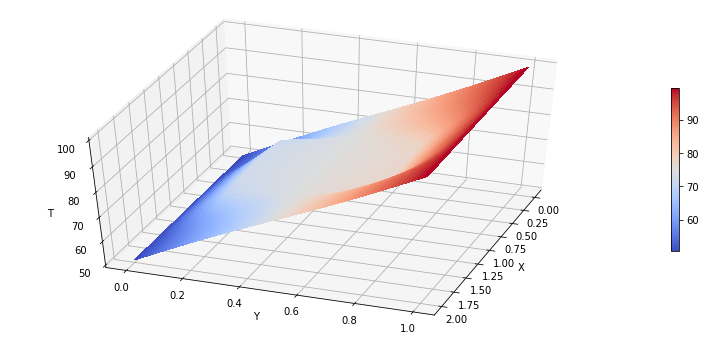

In [310]:
show_sol_appr(Tst_0) #Pour visualiser T0

#### Remarque
On marque dans le schéma ci-dessus une évolution progressive linéaire de la température stationnaire $T_{st}^0$ de sa valeur minimale $T_b=50$ sur $\Gamma1$ jusqu'à sa valeur maximale $T_b=100$ sur $\Gamma3$.

### VI.Exercice 4 page 8

#### Question 1 page 8 
La modification qui sera apportée au système $(5)$ est au niveau de la matrice $F$. Pour cela on définit la fonction $F$ qui prend comme argument les composantes du point de la source $f$ ainsi que la valeur de la résistance $r$ et retourne la matrice F correspondante en respectant la condition de Dirichlet homogène $(T_{b}=T_{h}=0)$. 
Pour chaque point $(i,j)$ du maillage on détermine sa position $p$ dans la matrice $F$ à l'aide de la fonction $h$ qui prend comme argument les indices $(i,j)$. Et à cette position $p$ on associe la valeur correspondante $f_{1}(x_{i},x_{j})$.

In [311]:
#__________________La fonction h qui retourne la position p dans F en prenant (i,j) comme arguments__________________#
def h(i,j):
    return((j-1)*Nx+i)


#remplir la matrice F:
def Fo(Sx,Sy,r):
    K=np.zeros((N,1)) #initialiser la matrice F
    for i in range(Nx):
        for j in range(1,Ny+1):
            p=h(i,j)
            xi,xj=i*hx,j*hy
            K[p,0]=np.exp(-((xi-Sx)**2+(xj-Sy)**2)/(2*(0.05**2)))
    return r*K

In [312]:
Xr1=(0.2*Lx,0.2*Ly)
Fr1=Fo(Xr1[0],Xr1[1],1)
#print(Fr1)

#### Question 2 page 8

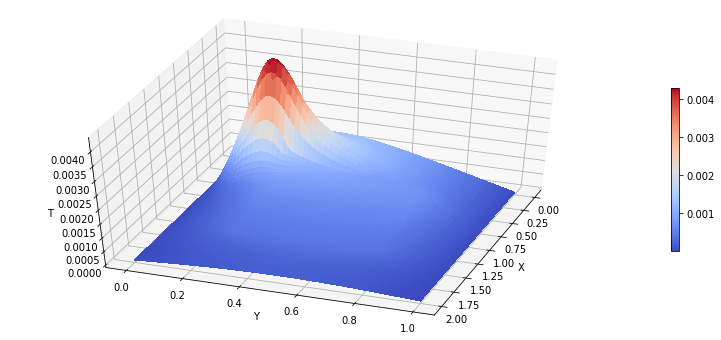

In [313]:
Tst_1=sol_appr(A,Fr1,0,0)
#print(Tst_1)
show_sol_appr(Tst_1) #Pour visualiser la distribution de la température Tst_1

#### Remarque
On remarque que la température $T_{st}^1$ présente une forme gaussienne centrée au point $r1$ de la source. Cette température décroit rapidement en s'éloignant du point de la source.  

#### Question 3 page 8

In [314]:
F2=Fo(Xr1[0],Xr1[1],1000)              #r est ici prise égale à 100
T2=sol_appr(A,F2,0,0)    
E=np.linalg.norm(T2-1000*Tst_1)  #calculer l'erreur entre la soltuion T2 et 100Tst_1
print(E)

1.2057517445763768e-14


Aprés avoir exécuté le code ci-dessus on remarque une faible valeur d'erreur $E$ de l'ordre de $e-14$ ce qui signifie que $T_{2}$ la solution du problème pour $r=100$ est égale à $100 T_{st}^{1}$ où $T_{st}^{1}$ est la solution du problème pour $r=1$. Ceci valide la linéarité de notre problème stationnaire.

#### Rappel 
On rappelle pour la suite des questions que la température $T_{st}$ du four s'exprime comme suit: $T_{st}=T_{st}^{0}$+$\sum_{i=1}^{N_{r}} r_{i}T_{st}^{i}$.

#### Question 4 page 8
La température s'exprime dans ce cas: $T_{st}=T_{st}^{0} + T_{st}^1$

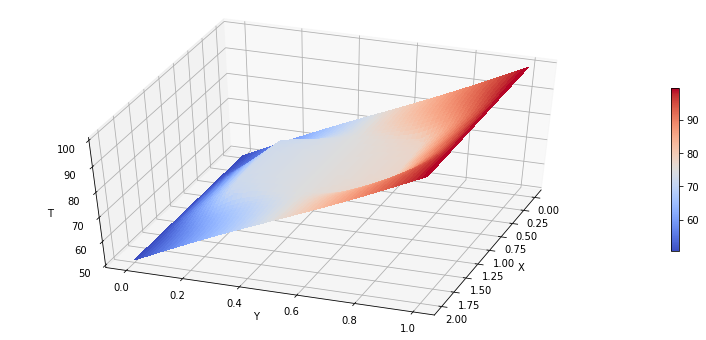

In [315]:
Tst=Tst_0+Tst_1        #calcul de Tst
show_sol_appr(Tst)  #Traçage de Tst

#### Question 5 page 8 
La température s'exprime dans ce cas: $T_{st}=T_{st}^{0}$+$\sum_{i=1}^{4} 100T_{st}^{i}$

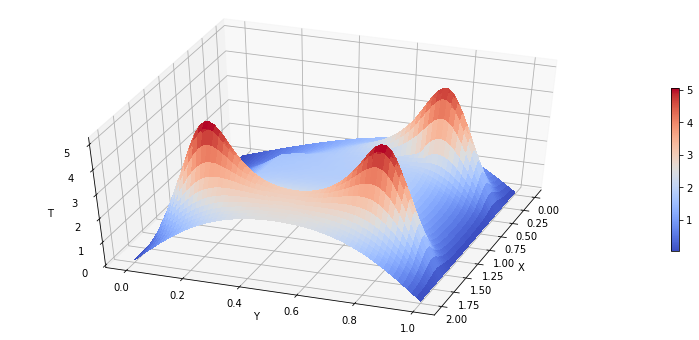

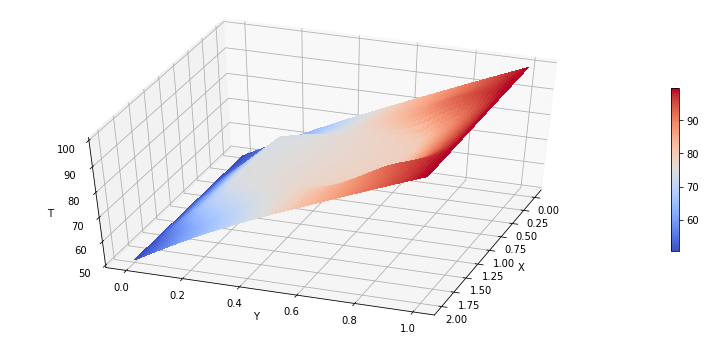

In [316]:
#Coordonnées des sources ajoutées:
r2x,r2y=0.8*Lx,0.2*Ly
r3x,r3y=0.8*Lx,0.8*Ly
r4x,r4y=0.2*Lx,0.8*Ly

#Détermination des Tst_i pour 2<=i<=4:
Tst_2=sol_appr(A,Fo(r2x,r2y,1000),0,0) 
Tst_3=sol_appr(A,Fo(r3x,r3y,1000),0,0) 
Tst_4=sol_appr(A,Fo(r4x,r4y,1000),0,0) 

#Température stationnaire T:
Tst+=Tst_2+Tst_3+Tst_4

#Traçage des résistances:
show_sol_appr(Tst-Tst_0) 

#Traçage de T:
show_sol_appr(Tst)

#### Question 6 page 8
La température s'exprime dans ce cas: $T_{st}=T_{st}^{0}$+$\sum_{i=1}^{6} 100T_{st}^{i}$

Pour généraliser à un nombre $N_{r}$ quelconque on va ajouter la fonction $CalculT$ qui retourne une liste contenant les températures $T_{st}^{i}$ correspondantes aux différentes résistances données en argument dans une liste $R$ de tuples.

In [317]:
#________________________Fonction qui calcule les températures correspondantes aux sources______________________________#
def CalculT(R,r):
    L=[]
    for e in R:
        x,y=e[0],e[1]
        L.append(sol_appr(A,Fo(x,y,r),0,0))   #Ajout de la température correspondante à la source r
    return L

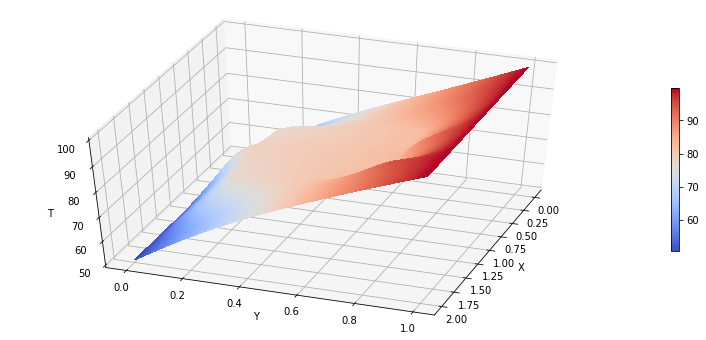

In [356]:
#Coordonnées des sources :
r1=(0.2*Lx,0.2*Ly)
r2=(0.5*Lx,0.2*Ly)
r3=(0.8*Lx,0.2*Ly)
r4=(0.8*Lx,0.8*Ly)
r5=(0.5*Lx,0.8*Ly)
r6=(0.5*Lx,0.2*Ly)
R=[r1,r2,r3,r4,r5,r6]
r=1000
#Détermination des Tst_i des sources ri, 1<=i<=6 
Temp=CalculT(R,r)

#Température stationnaire T:
Tst=Tst_0+sum(Temp)


#Traçage de T:
show_sol_appr(Tst)

#### Remarque
On remarque que plus on ajoute des point de sources et,la zone intérieur de notre domaine devient de plus en plus rougeâtre. Ce qui signifie que la température à l'intérieur de notre domaine s'élève. Ceci est un résultat attendu en fait car les sources servent à chauffer la zone $\Omega c$ qui se trouve à l'intérieur du domaine $\Omega$.

### VII.Etude de consistance-stabilité-convergence du schéma numérique stationnaire

#### Consistance
Pour étudier analytiquement la consistance du schéma numérique on effectue un développement de Taylor à l'ordre $4$ des deux premières équations. les erreurs de troncature $\epsilon_{j}^{n}$ de ces deux schémas sont du même ordre.

$\epsilon_{j}^{n}=\frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{h_{x}^{2}}+\frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{h_{y}^{2}}  $

$T_{i±1,j}=T_{i,j}±h_{x}\left.\frac{\partial T}{\partial x}\right|_{i,j}+h_{x}^2\left.\frac{\partial^2 T}{\partial x^2}\right|_{i,j}±h_{x}^3\left.\frac{\partial^3 T}{\partial x^3}\right|_{i,j}+h_{x}^4\left.\frac{\partial^4 T}{\partial x^4}\right|_{i,j}+O(h_{x}^5)$

$T_{i,j±1}=T_{i,j}±h_{y}\left.\frac{\partial T}{\partial y}\right|_{i,j}+h_{y}^2\left.\frac{\partial^2 T}{\partial y^2}\right|_{i,j}±h_{y}^3\left.\frac{\partial^3 T}{\partial y^3}\right|_{i,j}+h_{y}^4\left.\frac{\partial^4 T}{\partial y^4}\right|_{i,j}+O(h_{y}^5)$

D'où $\epsilon_{j}^{n}=O(h_{x}^2+h_{y}^2)$. 

##### Remarque
Le schéma numérique est d'ordre $2$ en espace. 

$\lim\limits_{h_{x},h_{y} \rightarrow 0} \epsilon_{j}^{n}=0$

Le schéma est donc $consistant$.


#### Stabilité(analytique et numérique)
L'étude numérique de stabilité du schéma numérique pour la température $T_{st}=T_{st}^{0}$+$\sum_{i=1}^{6} 100T_{st}^{i}$ revient simplement à l'étude de stabilité de la température $T_{st}^{0}$ car elle est la seule qui dépend des conditions aux limites $T_{b}$ et $T_{h}$. Par rôle de symétrie on se contente de varier uniquement $T_{b}$ et analyser la variation de $T_{st}^{0}$ en fonction de $T_{b}$.

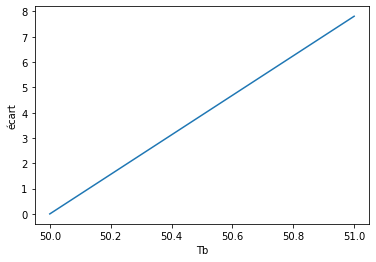

In [296]:
V0=np.linspace(50,51,11)                                    #11 valeurs équidistants entre 50 et 51
V1=[]
for e in V0:
    V1.append(npl.norm(sol_appr(A,F,e,100)-Tst_0))             #On ajoute la valeur de l'erreur entre T0 et la température calculée pour Tb=e
plt.xlabel('Tb')
plt.ylabel('écart')
plt.plot(V0,V1)
plt.show()

##### Remarque
On remarque que si la condition initiale $T_{b}$ s'écarte légèrement de la valeur $50$ le température calculée pour $T_{b}$ ne s'écarte pas beaucoup de $T_{st}^{0}$ calculée pour $T_{b}=50$. Ce qui justifie $la$ $stabilité$ de notre schéma.

#### Convergence
La convergence du schéma se déduit simplement à partir de l'étude de $la$ $consistance$ et de $la$ $stabilité$ qu'on vient juste d'établir.
On peut aussi étudier la convergence en visualisant la variation de l'erreur entre la solution exacte et la solution approchée pour différentes valeurs de $n_{x}$ et $n_{y}$.
Pour ce faire J'ai pris dans cette partie des valeurs de $n_{x}$ et $n_{y}$ égaux et en faisant varier leurs valeurs de $4$ à $12$ j'ai calculé à chaque fois l'erreur entre $T_{st}^{0}$ et $T_{st,exacte}^{0}$ pour obtenir les valeurs suivantes:

$Errors=[49.67087631557056,62.76072189673948,75.87060899628077,88.99183105017863,102.12028846500925,115.25371033801152,128.39070712654097, 141.53037057159665, 154.67207819452716]$.

La figure ci-dessous donne la variation de l'erreur en fonction de la valeur de $n_{x}(n_{x}=n_{y})$.

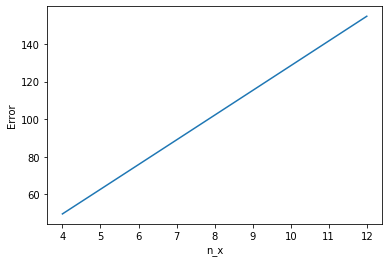

In [297]:
X=np.linspace(4,12,9)
Errors=[49.67087631557056,62.76072189673948,75.87060899628077,88.99183105017863,102.12028846500925,115.25371033801152,128.39070712654097,141.53037057159665,154.67207819452716]
plt.plot(X,Errors)
plt.xlabel('n_x')
plt.ylabel('Error')
plt.show()

##### Remarque
On remarque que l'erreur croît en fonction de $n_{x}$. On peut penser dés la première vue que notre schéma n'est pas convergent. Cependant avec les études de stabilité et de consistance qu'on a faites on a déduit que le schéma est convergent. Cette variation inattendue peut-être expliquée par une erreur de calcul au niveau des algorithmes utilisées pour résoudre le système linéaire $AX=F$.

### IIX.Exercice $5$ Page $9$    

#### Question 1 page 9
On remarque que le système $(3)$ de solution $T_{tr}$ est semblable au système $(2)$ de solution $T_{st}$ de point de vue de la variation spatiale avec un terme source $f=0$ et la condition de Dirichlet homogène $T=0$ sur $\Gamma_{1}\cup\Gamma_{3}$. Pour cette raison le schéma numérique correspondant à la variation spatiale de $T_{tr}$ est le même établi pour la variation de $T_{st}$.
La différence se fait au niveau du terme de la variation temporelle $\frac{\partial T_{tr}}{\partial t} dans$ $Ω$ qui est ajouté avec un schéma d'Euler $explicite$ au schéma spatial.

#### Question 2 page 9
#### Consistance
Pour étudier analytiquement la consistance du schéma numérique on effectue un développement de Taylor à l'ordre $4$ selon les variables $x$ et $y$ avec $(x,y)\in Ω$ et un développement de Taylor à l'ordre $2$ selon la variables $t$.
On va noter par $\kappa$ un élément de $\{\kappa_{a},\kappa_{c}\}$ pour généraliser l'étude à tout le domaine $\Omega$. 

$\epsilon_{i,j}^{m}=\frac{T_{i,j}^{m+1}-T_{i,j}^m}{\Delta t}-\kappa \frac{T_{i+1,j}^m-2T_{i,j}^m+T_{i-1,j}^m}{h_{x}^{2}}-\kappa\frac{T_{i,j+1}^m-2T_{i,j}^m+T_{i,j-1}^m}{h_{y}^{2}}  $

$T_{i±1,j}=T_{i,j}±h_{x}\left.\frac{\partial T}{\partial x}\right|_{i,j}+h_{x}^2\left.\frac{\partial^2 T}{\partial x^2}\right|_{i,j}±h_{x}^3\left.\frac{\partial^3 T}{\partial x^3}\right|_{i,j}+h_{x}^4\left.\frac{\partial^4 T}{\partial x^4}\right|_{i,j}+O(h_{x}^5)$

$T_{i,j±1}=T_{i,j}±h_{y}\left.\frac{\partial T}{\partial y}\right|_{i,j}+h_{y}^2\left.\frac{\partial^2 T}{\partial y^2}\right|_{i,j}±h_{y}^3\left.\frac{\partial^3 T}{\partial y^3}\right|_{i,j}+h_{y}^4\left.\frac{\partial^4 T}{\partial y^4}\right|_{i,j}+O(h_{y}^5)$

$T_{i,j}^{m+1}=T_{i,j}^{m}+\Delta t \left.\frac{\partial T}{\partial t}\right|_{i,j,m}+(\Delta t)^2 \left.\frac{\partial^2 T}{\partial t^2}\right|_{i,j,m}+O((\Delta t)^3)$

L'erreur de troncature $\epsilon_{j}^{m}$ est donnée par:

$\epsilon_{i,j}^{m}=O(h_{x}^2+h_{y}^2+\Delta t)$

##### Remarque
Le schéma numérique est d'ordre $2$ en espace et d'ordre $1$ en temps. 

$\lim\limits_{h_{x},h_{y},\Delta t \rightarrow 0} \epsilon_{i,j}^{m}=0$

Le schéma est donc $consistant$.

#### Stabilité
Pour étudier la stabilité du schéma on va utiliser la méthode de Fourier-Von Neumann.

On note par $\hat{T}$ la transformée de Fourier de la fonction $T$ et par $\kappa$ un élément de $\{\kappa_{a},\kappa_{c}\}$ pour généraliser l'étude à tout le domaine $\Omega$. .

Le schéma $\frac{T_{i,j}^{m+1}-T_{i,j}^m}{\Delta t}-\kappa \frac{T_{i+1,j}^m-2T_{i,j}^m+T_{i-1,j}^m}{h_{x}^{2}}-\kappa\frac{T_{i,j+1}^m-2T_{i,j}^m+T_{i,j-1}^m}{h_{y}^{2}}=0  $ se réecrit:

$\frac{T^{m+1}(x,y)-T^m(x,y)}{\Delta t}-\kappa \frac{T^m(x+h_{x},y)-2T^m(x,y)+T^m(x-h_{x},y)}{h_{x}^{2}}-\kappa\frac{T^m(x,y+h_{y})-2T_{i,j}^m+T^m(x,y-h_{y})}{h_{y}^{2}}=0 $

On effectue la transformée de Fourier selon les variables spatiales $(x,y)$ pour obtenir:

$\frac{\hat{T}^{m+1}(x,y)-\hat{T}^m(x,y)}{\Delta t}-\kappa \frac{e^{i h_{x}}\hat{T}^m(x,y)-2\hat{T}^m(x,y)+e^{-i h_{x}}\hat{T}^m(x,y)}{h_{x}^{2}}-\kappa\frac{e^{i h_{y}}\hat{T}^m(x,y)-2\hat{T}^m_{i,j}+e^{-i h_{y}}\hat{T}^m(x,y)}{h_{y}^{2}}=0 $

Cette équation s'écrit sous la forme:

$\hat{T}^{m+1}(x,y)=\hat{S}_{h_{x},h_{y}}(\Delta t)\hat{T}^{m}(x,y)$

avec $\hat{S}_{h_{x},h_{y}}(\Delta t)=1-4\kappa \Delta t(\frac{\sin^2(\frac{h_{x}}{2})}{h_{x}^2}+\frac{\sin^2(\frac{h_{y}}{2})}{h_{y}^2}) $

Le schéma est $L^2$ stable ssi $S_{h_{x},h_{y}}(\Delta t)=\| \hat{S}_{h_{x},h_{y}}(\Delta t)\|={\sup_{{(x,y)\in \mathbb{R}^2}} | \hat{S}_{h_{x},h_{y}}(\Delta t)|} \leq 1$

Cette condition de stabilité se réduit à l'inégalité:

$\frac{\sin^2(\frac{h_{x}}{2})}{h_{x}^2}+\frac{\sin^2(\frac{h_{y}}{2})}{h_{y}^2} \leq \frac{1}{2\kappa \Delta t}$

#### Remarque
Dans le cas général on a $h_{x}$ et $h_{y}$ trés faibles. Par développement limité on aura $\frac{\sin^2(\frac{h_{x}}{2})}{h_{x}^2}\sim \frac{1}{4}$ et $\frac{\sin^2(\frac{h_{y}}{2})}{h_{y}^2}\sim \frac{1}{4}$.

La condition de stabilité peut être simplifiée en:

$\kappa \Delta t\leq 1 $

#### Consistance
Nous avons montré que le schéma est consistant.

En respectant la condition de stabilité donnée précédemment on garantit la stabilité du schéma.

La convergence est obtenue grâce à la consistance et la stabilité du schéma numérique.

#### Question 3 page 9
En utilisant les notations de la formulation matricielle du problème stationnaire $(Question 1 page 7)$, on aura:

La formulation matricielle de la zone $Z1$ et $\Gamma_{1}$est donnée par:

$ T_{j}^{m+1}=-B_{1}T_{j-1}^m + (\mathbb{1}-\Delta t A_{1})T_{j}^m - B_{1}T_{j+1}^m$   si $ j \notin \{1,4 n_{y} -1\}$

$ T_{1}^{m+1}= (\mathbb{1}-\Delta t A_{1})T_{1}^m - B_{1}T_{2}^m$ si $ j=1$

$ T_{4 n_{y}-1}^{m+1}=-B_{1}T_{4 n_{y}-2}^m + (\mathbb{1}-\Delta t A_{1})T_{4 n_{y}-1}^m $ si $j=4 n_{y}-1$

La formulation matricielle de la zone $Z2$ est donnée par:

$ T_{j}^{m+1}=-B_{2}T_{j-1}^m + (\mathbb{1}-\Delta t A_{2})T_{j}^m - B_{2}T_{j+1}^m$

La formulation matricielle de la zone $Z3$ est donnée par:

$ T_{n_{y}}^{m+1}=-B_{1}T_{n_{y}-1}^m + (\mathbb{1}-\Delta t A_{3})T_{n_{y}}^m - B_{2}T_{n_{y}+1}^m$

La formulation matricielle de la zone $Z4$ est donnée par:

$ T_{3n_{y}}^{m+1}=-B_{2}T_{3n_{y}-1}^m + (\mathbb{1}-\Delta t A_{3})T_{3n_{y}}^m - B_{1}T_{n_{y}+1}^m$

De cette manière on construit les blocs de la matrice $B$.

La matrice $B$ déduite est une matrice trigonale par blocs qui s'écrit sous la forme:

$$
\begin{equation*}\\
\begin{pmatrix}
\mathbb{1}_{N_{x}}-\Delta t A_{1} & -B_{1} & 0 & \cdots & \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots & 0 \\
-B_{1} & \mathbb{1}_{N_{x}}-\Delta t A_{1}  & -B_{1} & \ddots &&&&&&&&& \vdots \\
0  & \ddots  & \ddots & \ddots  & \ddots   &&&&&&&& \vdots \\
\vdots & \ddots & -B_{1} & \mathbb{1}_{N_{x}}-\Delta t A_{1}  & -B_{1} &\ddots  &&&&&&& \vdots\\
\vdots && \ddots & -B_{1} &\mathbb{1}_{N_{x}}-\Delta t A_{3} & -B_{2} & \ddots &&&&&& \vdots  \\
\vdots &&& \ddots & -B_{2} & \mathbb{1}_{N_{x}}-\Delta t A_{2} & -B_{2} &\ddots &&&&&\vdots\\
\vdots &&&& \ddots & \ddots & \ddots & \ddots & \ddots &&&& \vdots\\
\vdots &&&&& \ddots & -B_{2} & \mathbb{1}_{N_{x}}-\Delta t A_{2} & -B_{2}  &\ddots &&& \vdots\\ 
\vdots &&&&&& \ddots & -B_{2} & \mathbb{1}_{N_{x}}-\Delta t A_{3}  & -B_{1} &\ddots & &\vdots\\
\vdots &&&&&&& \ddots &  -B_{1}  & \mathbb{1}_{N_{x}}-\Delta t A_{1} & -B_{1} &\ddots &0\\
\vdots &&&&&&&& \ddots & \ddots &\ddots  & \ddots  &0\\
\vdots &&&&&&&&& \ddots & -B_{1} & \mathbb{1}_{N_{x}}-\Delta t A_{1} & -B_{1}\\
0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots &  \cdots  & \cdots & 0 & -B_{1} & \mathbb{1}_{N_{x}}-\Delta t A_{1} \\
\end{pmatrix}
\end{equation*}
$$

On conclut que $T^{m+1}=BT^{m}$ avec $B=(\mathbb{1}_{N}-\Delta t A)$, $\forall m \ge 0$


#### Question $4$ et $5$ page $9$
On donne ci-dessous le code qui nous donne deux listes contenant chacune les températures $T^m$ et $T=T^m+T_{st}$ aux instants $m \Delta t$.

On remarque que le choix d'une condition initiale de la température totale $T$: $T_0=T_{st}$ nous donne $T^0=0$ et par suite toutes les valeurs de $T^m$ seront nulles c-à-d que la température transitoire est nulle. Ce qui est tout à fait logique car en prenant une température initiale égale à la température stationnaire ne nécessite pas une variation temporelle pour passer de $T_{st}$ à une nouvelle valeur de température.

On choisit une température initiale quadratique de $y$ qui prend les valeurs $T_b$ et $T_h$ sur les parois $\Gamma 1$ et $\Gamma 3$ ce qui garantit l'existence d'une température transitoire qui varie en fonction du temps. Un tel choix peut être donnée par la température:

$T_0(y)=\frac{T_b+T_h}{2}y^2+\frac{T_h-\frac{T_b+T_h}{2}(N_y+2)^2-T_b}{N_y+2}y+T_b$

On remarque que $T_0(0)=T_b$ et que $T_0((Ny+1)h_y)=T_h$.

In [357]:
#Construction de T0:
phi_m = [i*hx for i in range(4*nx + 1)]
phi_q = [i*hy for i in range(1,4*ny)]
phi_p = [(i*hy)**2 for i in range(1,4*ny)]
X1,Y1=np.meshgrid(phi_m, phi_q)
X2,Y2=np.meshgrid(phi_m, phi_p)
T0=(Tb-Th)/((Ny+1)**2*hy**2)*Y2-2*((Tb-Th)/((Ny+1)*hy))*Y1+Tb

#Tst=Tst_0
TT=Tst[1:Ny+1,:].reshape((N,1))
Ttr_0=T0.reshape((N,1))-TT
B=np.identity(N)-deltat*A
V=[Ttr_0]                     #liste des Temp transitoires
T=[T0.reshape(N,1)]           #liste des Temp globales
Norm=[np.linalg.norm(V[0])]   #liste des normes des températures transitoires

for m in range(1,M+1):
    V.append(np.dot(B,V[-1]))
    T.append(V[-1]+Tst[1:Ny+1,:].reshape(N,1))
    Norm.append(np.linalg.norm(V[-1]))

    
for m in range(0,M+1):
    #Ajout des conditions aux limites sur Γ1 et Γ3 pour les éléments de V:
    V0=np.zeros((Nx,1))
    P=np.concatenate((V0,V[m],V0))
    V[m]=P.reshape(4*ny+1,Nx)
    
    #Ajout des conditions aux limites sur Γ1 et Γ3 pour les éléments de T:
    V0=Tb*np.ones((Nx,1))
    V2=Th*np.ones((Nx,1))
    P=np.concatenate((V0,T[m],V2))
    T[m]=P.reshape(4*ny+1,Nx)

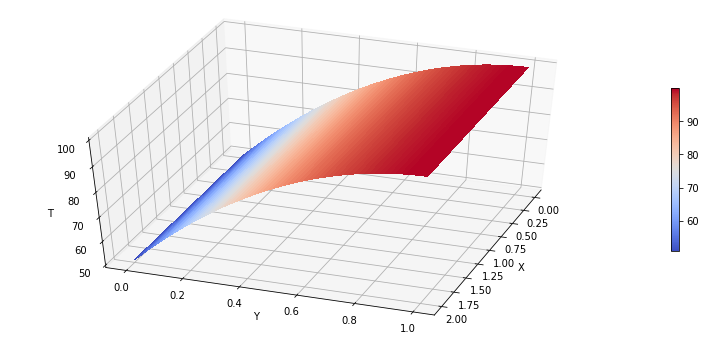

In [358]:
show_sol_appr(T[0])

### IX.Exercice $6$ Page $10$

#### Question $1$ page $10$
On remarque que le système $(3)$ de solution $T_{tr}$ est semblable au système $(2)$ de solution $T_{st}$ de point de vue de la variation spatiale avec un terme source $f=0$ et la condition de Dirichlet homogène $T=0$ sur $\Gamma_{1}\cup\Gamma_{3}$. Pour cette raison le schéma numérique correspondant à la variation spatiale de $T_{tr}$ est le même établi pour la variation de $T_{st}$.
La différence se fait au niveau du terme de la variation temporelle $\frac{\partial T_{tr}}{\partial t} dans$ $Ω$ qui est ajouté avec un schéma d'Euler $explicite$ au schéma spatial.

#### Question $2$ page $10$
##### Consistance
En se basant sur la même étude faite précédemment, on obtient la consistance du schéma dont l'erreur de troncature $\epsilon_{i,j}^{m}$ est donnée par:

$\epsilon_{i,j}^{m}=O(h_{x}^2+h_{y}^2+\Delta t)$

##### Stabilité
Pour étudier la stabilité du schéma on va utiliser la méthode de Fourier-Von Neumann.

On note par $\hat{T}$ la transformée de Fourier de la fonction $T$ et par $\kappa$ un élément de $\{\kappa_{a},\kappa_{c}\}$ pour généraliser l'étude à tout le domaine $\Omega$. .

Le schéma $\frac{T_{i,j}^{m+1}-T_{i,j}^m}{\Delta t}-\kappa \frac{T_{i+1,j}^{m+1}-2T_{i,j}^{m+1}+T_{i-1,j}^{m+1}}{h_{x}^{2}}-\kappa\frac{T_{i,j+1}^{m+1}-2T_{i,j}^{m+1}+T_{i,j-1}^{m+1}}{h_{y}^{2}}=0  $ se réecrit:

$\frac{T^{m+1}(x,y)-T^{m}(x,y)}{\Delta t}-\kappa \frac{T^{m+1}(x+h_{x},y)-2T^{m+1}(x,y)+T^{m+1}(x-h_{x},y)}{h_{x}^{2}}-\kappa\frac{T^{m+1}(x,y+h_{y})-2T_{i,j}^{m+1}+T^{m+1}(x,y-h_{y})}{h_{y}^{2}}=0 $

On effectue la transformée de Fourier selon les variables spatiales $(x,y)$ pour obtenir:

$\frac{\hat{T}^{m+1}(x,y)-\hat{T}^m(x,y)}{\Delta t}-\kappa \frac{e^{i h_{x}}\hat{T}^{m+1}(x,y)-2\hat{T}^{m+1}(x,y)+e^{-i h_{x}}\hat{T}^{m+1}(x,y)}{h_{x}^{2}}-\kappa\frac{e^{i h_{y}}\hat{T}^{m+1}(x,y)-2\hat{T}^{m+1}_{i,j}+e^{-i h_{y}}\hat{T}^{m+1}(x,y)}{h_{y}^{2}}=0 $

Cette équation s'écrit sous la forme:

$\hat{T}^{m+1}(x,y)=\hat{S}_{h_{x},h_{y}}(\Delta t)\hat{T}^{m}(x,y)$

avec $\hat{S}_{h_{x},h_{y}}(\Delta t)=\frac{1}{1+4\kappa \Delta t(\frac{\sin^2(\frac{h_{x}}{2})}{h_{x}^2}+\frac{\sin^2(\frac{h_{y}}{2})}{h_{y}^2})} $

Le schéma est $L^2$ stable ssi $S_{h_{x},h_{y}}(\Delta t)=\| \hat{S}_{h_{x},h_{y}}(\Delta t)\|={\sup_{{(x,y)\in \mathbb{R}^2}} | \hat{S}_{h_{x},h_{y}}(\Delta t)|} \leq 1$

Cette condition de stabilité est toujours vérifiée ce qui garantit $la$ $stabilité$ du schéma implicite.

#### Convergence
On a démontré la consistance et la stabilité du schéma qui est toujours vérifiée. On déduit alors que le schéma explicite est $convergent$.

#### *Commentaire*
En comparant les deux schémas (explicite et implicite), on déduit que le schéma implicite est mieux car il est toujours stable sous aucune condition contrairement au schéma explicite où la condition de stabilité doit être vérifiée.

#### Questions $3$ page $10$
En faisant une étude semblable à celle de l'exercice précédent, on démontre que $T^{m}$ s'exprime simplement en fonction de $T^{m+1}$ sous la forme:

$BT^{m+1}=T^{m}$,$\forall \, m \ge 0$ avec $B=(\mathbb{1}_{N}+\Delta t A)$

#### Question $4$ et $5$ page $10$
On donne ci-dessous le code qui nous donne deux listes contenant chacune les températures $T^m$ et $T=T^m+T_{st}$ aux instants $m \Delta t$.

On remarque que le choix d'une condition initiale de la température totale $T$: $T_0=T_{st}$ nous donne $T^0=0$ et par suite toutes les valeurs de $T^m$ seront nulles c-à-d que la température transitoire est nulle. Ce qui est tout à fait logique car en prenant une température initiale égale à la température stationnaire ne nécessite pas une variation temporelle pour passer de $T_{st}$ à une nouvelle valeur de température.

On choisit une température initiale quadratique de $y$ qui prend les valeurs $T_b$ et $T_h$ sur les parois $\Gamma 1$ et $\Gamma 3$ ce qui garantit l'existence d'une température transitoire qui varie en fonction du temps. Un tel choix peut être donnée par la température:

$T_0(y)=\frac{T_b-T_h}{(N_y+1)^2h_y^2}y^2-2\frac{T_b-T_h}{(N_y+1)h_y}y+T_b$

On remarque que $T_0(0)=T_b$ et que $T_0((Ny+1)h_y)=T_h$.

In [359]:
#Construction de T0:
phi_m = [i*hx for i in range(4*nx + 1)]
phi_q = [i*hy for i in range(1,4*ny)]
phi_p = [(i*hy)**2 for i in range(1,4*ny)]
X1,Y1=np.meshgrid(phi_m, phi_q)
X2,Y2=np.meshgrid(phi_m, phi_p)
T0=(Tb-Th)/((Ny+1)**2*hy**2)*Y2-2*((Tb-Th)/((Ny+1)*hy))*Y1+Tb


Tst=Tst_0
TE=Tst[1:Ny+1,:].reshape((N,1))
Ttr_0=T0.reshape((N,1)) -TE
B=np.linalg.inv(np.identity(N)+deltat*A)
V=[Ttr_0]                       #liste des Temp transitoires
T=[T0.reshape(N,1)]             #liste des Temp globales
Norm=[np.linalg.norm(V[0])]     #normes des températures transitoires
for m in range(1,M+1):
    V.append(np.dot(B,V[-1]))
    T.append(V[-1]+Tst[1:Ny+1,:].reshape(N,1))
    Norm.append(np.linalg.norm(V[-1]))

    
for m in range(0,M+1):
    #Ajout des conditions aux limites sur Γ1 et Γ3 pour les éléments de V:
    V0=np.zeros((Nx,1))
    P=np.concatenate((V0,V[m],V0))
    V[m]=P.reshape(4*ny+1,Nx)
    
    #Ajout des conditions aux limites sur Γ1 et Γ3 pour les éléments de T:
    V0=Tb*np.ones((Nx,1))
    V2=Th*np.ones((Nx,1))
    P=np.concatenate((V0,T[m],V2))
    T[m]=P.reshape(4*ny+1,Nx)


             


### X.Exercice $7$ Page $11$ 

#### Question 1 page 11

La matrice $\tilde{A}$ est définie par ses coefficients $a_{i,j}=\int_{\Omega_{c}} T_{st}^{i}(x)T_{st}^{j}(x)$.

Il est clair que  $a_{i,j}=\int_{\Omega_{c}} T_{st}^{i}T_{st}^{j}=\int_{\Omega_{c}} T_{st}^{j}T_{st}^{i}=a_{j,i}$.

Et donc la matrice $\tilde{A}$ est $symétrique$.

Pour montrer que la matrice $\tilde{A}$ est définie positive,on va écrire $\tilde{A}$ sous une autre forme.

En effet $\tilde{A}=\int_{\Omega_{c}}MM^{T}$ en utilisant la linéarité de l'intégrale, avec:
$$
\begin{equation*}
M=
\begin{pmatrix}
T_{st}^{1} & 0 & \cdots & \cdots & \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots& \cdots & 0 \\
T_{st}^{2}& 0 &&&&&&&&&&& 0   \\
\vdots  & \vdots&\ddots &&&&&&&&&& \vdots \\
\vdots & \vdots &&\ddots &&&&&&&&& \vdots \\
\vdots &\vdots&&&\ddots &&&&&&&& \vdots\\
\vdots &\vdots&&&&\ddots &&&&&&& \vdots\\
\vdots &\vdots&&&&&\ddots &&&&&& \vdots\\
\vdots &\vdots&&&&&&\ddots &&&&& \vdots\\ 
\vdots &\vdots&&&&&&&\ddots &&&& \vdots\\
\vdots &\vdots&&&&&&&&\ddots &&& \vdots\\
\vdots &\vdots&&&&&&&&&\ddots && \vdots\\
T_{st}^{N_{r}-1} &0&&&&&&&&&&\ddots&\vdots\\
T_{st}^{N_{r}} & 0 & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots &  \cdots  & \cdots & \cdots & \cdots & 0 \\
\end{pmatrix}
\end{equation*}
$$

Soit $r \in \mathbb{R}^{N_{r}}$,
$$
\begin{align}
(\tilde{A}r,r)&= (\int_{\Omega_{c}}MM^{T}r,r) \\
              &= \int_{\Omega_{c}}(MM^{T}r,r) \\
              &= \int_{\Omega_{c}}(Mr,Mr)  \\
              &=\int_{\Omega_{c}} \|Mr\|^{2} 
\end{align}
$$
On remarque que $\int_{\Omega_{c}} \|Mr\|^{2} \ge 0$, donc la matrice $\tilde{A}$ est $positive$.

Pour montrer que $\tilde{A}$ est $définie$, on doit montrer que :


$r^{T}\tilde{A}r=0 \implies r=0$ avec:

$$
\begin{equation*}
r=
\begin{pmatrix}
r_1\\
\vdots\\
r_{N_{r}}\\
\end{pmatrix}
\end{equation*}
$$.

En effet, $r^{T}\tilde{A}r=0 \implies \int_{\Omega_{c}} \|Mr\|^{2}=0$

La fonction $(x,y)  \mapsto \|Mr\|^{2}$ est continue sur $\Omega_{c}$ et positive. Il s'en suit:

$
\begin{array}{ccl}
\int_{\Omega_{c}} \|Mr\|^{2}=0 & \Leftrightarrow & \|Mr\|^{2}=0 \\
              & \Leftrightarrow & Mr=0 \\
              & \Leftrightarrow & \sum_{i=1}^{N_{r}} r_{i}T_{st}^{i}=0  \\
              & \Leftrightarrow & \sum_{i=1}^{N_{r}} r_{i}A^{-1}F^{i}=0 \quad\text{avec}\quad A T_{st}^{i}=F^i \\
              & \Leftrightarrow & \sum_{i=1}^{N_{r}} r_{i}F^{i}=0 \\
              & \Leftrightarrow & \sum_{i=1}^{N_{r}} r_{i}f_{i}=0 \quad\text{avec}\quad f_{i}=\exp(-(\frac{(x-x_{r_i})^2+(y-y_{r_i})^2}{2(0.05)^2})) 
\end{array}
$

Il suffit donc de montrer que la famille des fonctions $(f_{i})_{1 \leq i \leq N_r}$ est libre pour chaque $N_r$ pour avoir $r=0$.

Pour cela on procède au raisonnement par récurrence.

$Pour$ $N_r=1$ et $N_r=2$ le résultat est évident.(Dans le cas $N_r=2$ il suffit d'évaluer $f_1$ et $f_2$ à l'origine)

$Hypothèse$ $de$ $Récurrence$ $(H.R):$ Soit $N_r \ge 2$.Supposons que la famille $(f_{i})_{1 \leq i \leq k}$ est libre pour $k \leq N_r$ et montrons que $(f_{i})_{1 \leq i \leq N_r+1}$ est libre.

On prend une combinaison nulle $\sum_{i=1}^{N_{r}+1} \alpha_{i}f_{i}=0$ $(*)$

On note $x_{i_0}=\max \{x_i,\,1\leq i \leq N_r\}$.

On divise l'expression $(*)$ par $\exp(-(\frac{(x-x_{i_0})^2}{2(0.05)^2}))$.On obtient:

$\sum_{i=1}^{nb} \alpha_{i}\exp(\frac{(y-y_{r_i})^2}{2(0.05)^2})+
\sum_{i=nb+1}^{N_{r}+1} \alpha_{i}\exp(\frac{-2x(x_{i_0}-x_i)+(y-y_{r_i})^2}{2(0.05)^2})=0$ 

en notant $nb$ le nombre des $f_i$ placés aux points $(x_i,y_i)$ tel que $x_i=x_{i_0}$.

Dans la seconde somme on a $ x_{i}< x_{i_0}$ pour chaque $i$.
 
Lorsqu'on fait tendre $x \rightarrow + \infty$ on aura seulemnt:

$\sum_{i=1}^{nb} \alpha_{i}\exp(\frac{(y-y_{r_i})^2}{2(0.05)^2})$=0 $(**)$

Nous sommes sûrs maintenant que tous le $y_i$ sont distincts. On note $y_{i_1}=\max \{y_i,\,1\leq i \leq nb\}$

On divise $(**)$ par $\exp(\frac{(y-y_{i_1})^2}{2(0.05)^2})$ pour obtenir:

$\alpha_{i_1}+\sum \limits_{\underset{i \neq i_1}{i=1}}^{n_b} \alpha_{i}\exp(\frac{(y_i-y_{i_1})y}{(0.05)^2})=0$

Puisqu'on a $y_{i} < y_{i_1}$ pour chaque $i$, lorsqu'on fait tendre $y\rightarrow + \infty$ on aura seulement:

$\alpha_{i_1}=0$

La somme $(*)$ se réduit donc à une somme de $N_r$ termes seulement.

D'aprés $(H.R)$ la famille $(f_{i})_{i \in  [\![1;N_r+1]\!]\setminus \{i_1\} }$ est libre

On conclut alors que $\alpha_i=0$, $\forall$ $1\leq i \leq N_r+1$.

Ce qui prouve que $(H.R)$ reste valable à l'ordre $N_r+1$

On conclut alors que $(f_{i})_{1 \leq i \leq N_r}$ est libre pour chaque $N_r$.

Par conséquent, $\sum_{i=1}^{N_{r}} r_{i}f_{i}=0 \implies r_{i}=0$ pour tout $1\leq i \leq N_r$.

Alors $r=0$. 

On déduit alors que la matrice $\tilde{A}$ est définie.

#### Question 2 page 11
Pour calculer les coefficients $a_{i,j}$,$b_{i}$ et $c$ on va implémenter la fonction $quadr$ qui prend en argument un tableau $Temp$ contenant les températures stationnaires correspondantes aux différentes résistances et qui retourne $\tilde{A},b$ et $c$.

Cette fonction fait appel à la fonction $integ$ qui calcule l'intégrale d'une fonction $f$ sur $\Omega_{c}$ par la méthode des rectangles à gauche.

En effet, en adaptant une subdivision régulière pour chacun des intervalles $[n_{x},3n_{x}]$ et $[n_{y},3n_{y}]$ de tailles respectives $h_{x}$ et $h_{y}$, l'intégrale sur $\Omega_{c}$ d'une fonction $f$ dépendant de $(x,y)$ se réduit à:

$$\int_{\Omega_{c}} f={h_{x}h_{y}}\sum_{j=0}^{2n_{y}-1}\sum_{i=0}^{2n_{x}-1} f(n_{x}+i ,n_{y}+j)$$



In [24]:
def integ(f):
    S=0
    for j in range (2*ny):
        for i in range (2*nx):
            S+=f[ny+j,nx+i]
    return hx*hy*S

In [25]:
def quadr(Temp,Tc):
    s=len(Temp)
    A0=np.zeros((s,s))
    b0=np.zeros((s,1))
    for j in range (s):
        b0[j,0]=integ((Tst_0-Tc)*Temp[j])
        for i in range (s):
            if i==j:
                A0[i,i]=integ(Temp[i]*Temp[i])
            else:
                v=integ(Temp[i]*Temp[j])
                A0[i,j],A0[j,i]=v,v
    c0=1/2*integ((Tst_0-Tc)**2)
    return A0,-b0,c0

### XI.Exercice $8$ Page $12$
#### Rappel
On rappelle ici que nous sommes en mesure de minimiser sur $\mathbb{R}^{N_{r}}$ la fonction quadratique $J$ définie par:

$J(r)=\frac{1}{2}(\tilde{A}r,r)-(\tilde{b},r)+c$

La fonction quadratique est une fonction convexe. Cette condition nous donne l'existence et l'unicité du minimum de $J$ dont la condition d'optimalité est donnée par:

$\nabla J(r)=0$ c-à-d $\tilde{A}r=\tilde{b}$

#### Question 1 page 12

[[239126.53700382]]
1172.6784350555226


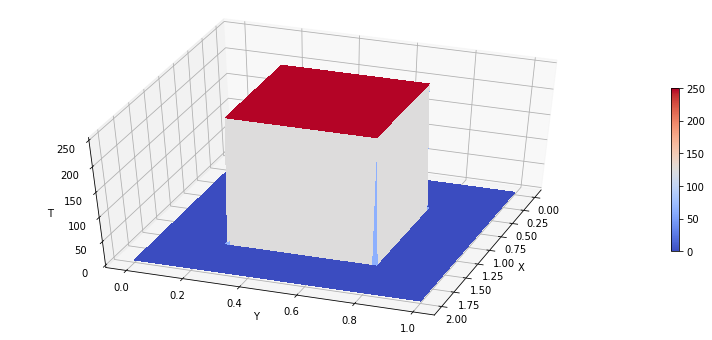

In [29]:
#Coordonnées de la source:
r1=(0.2*Lx,0.2*Ly)
R=[r1]

#La température de contrainte Tc:
Tc=np.zeros((Tst_0.shape))
Tc[ny:3*ny+1,nx:3*nx+1]=250*np.ones(Tst_0[ny:3*ny+1,nx:3*nx+1].shape)

#Calcul de Tst_1:
Temp=CalculT(R,1)

#Détermination de A0,B0 et c de la fonction quadratique:
A0,B0,c0=quadr(Temp,Tc)

#Détermination de la solution optimale:
r=np.linalg.solve(A0,B0)
print(r)

#Calcul de e1:
T=Tst_0+r[0,0]*Temp[0]
e1=integ((Tc-T)**2)
print(e1)

#La température de contrainte.
show_sol_appr(Tc)

#### Question 2 page 12

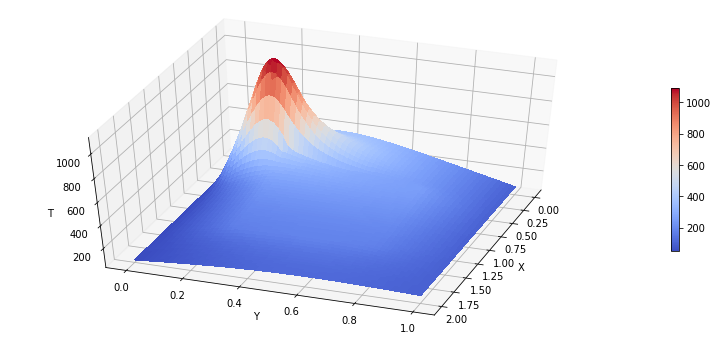

In [30]:
#Traçage de T:
show_sol_appr(T)

#### Question 3 page 12

les résistances optimales : 
 [[67172.03309779]
 [73748.39595629]
 [61391.77131666]
 [60829.48976537]]
e= 45.87190511652314


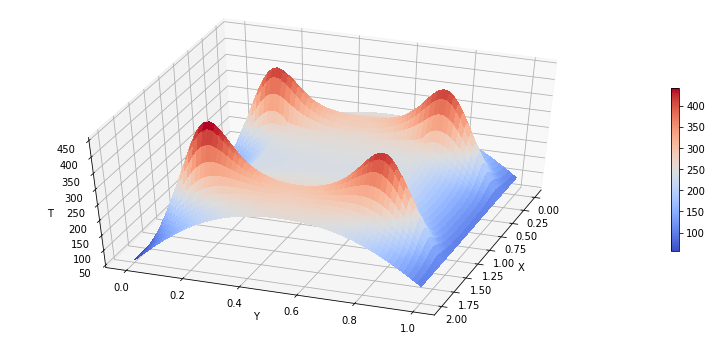

In [31]:
#Les coordonnées des sources 
r1=(0.2*Lx, 0.2*Ly)
r2=(0.8*Lx, 0.2*Ly)
r3=(0.8*Lx, 0.8*Ly)
r4=(0.2*Lx, 0.8*Ly)
R=[r1,r2,r3,r4]

#Calcul des Tst_i  1<=i<=4:
Temp=np.array(CalculT(R,1))

#Détermination de A0,B0 et c de la fonction quadratique:
A0,B0,c0=quadr(Temp,Tc)

#Détermination de la solution optimale:
r=np.linalg.solve(A0,B0)
print("les résistances optimales : ""\n",r)
r=r[:,0]
S=[r[i]*Temp[i] for i in range(Temp.shape[0])]


T=Tst_0+sum(S)

#Calcul de e:
e=integ((Tc-T)**2)
print("e=",e)

#Traçage de T:
show_sol_appr(T)

les résistances optimales : 
 [[45976.92955712]
 [33693.7966305 ]
 [48334.56131655]
 [35648.59929073]
 [25794.02077527]
 [36409.56446053]]
e= 2.753369537149788


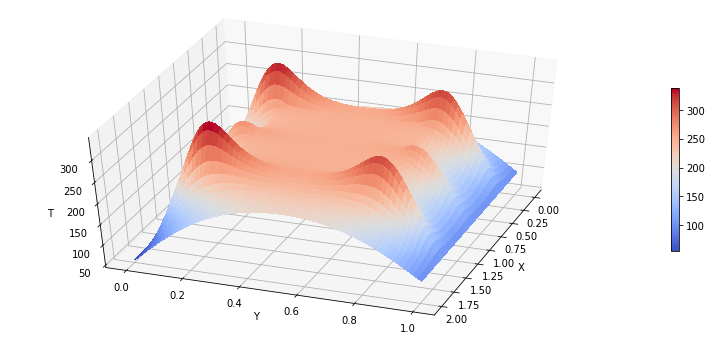

In [33]:
#Les coordonnées des sources 
r1=(0.2*Lx, 0.2*Ly)
r2=(0.5*Lx, 0.2*Ly)
r3=(0.8*Lx, 0.2*Ly)
r4=(0.8*Lx, 0.8*Ly)
r5=(0.5*Lx, 0.8*Ly)
r6=(0.2*Lx, 0.8*Ly)
R=[r1,r2,r3,r4,r5,r6]

#Calcul des Tst_i  1<=i<=4:
Temp=np.array(CalculT(R,1))

#Détermination de A0,B0 et c de la fonction quadratique:
A0,B0,c0=quadr(Temp,Tc)

#Détermination de la solution optimale:
r=np.linalg.solve(A0,B0)
print("les résistances optimales : ""\n",r)
r=r[:,0]
S=[r[i]*Temp[i] for i in range(Temp.shape[0])]


T=Tst_0+sum(S)

#Calcul de e:
e=integ((Tc-T)**2)
print("e=",e)

#Traçage de T:
show_sol_appr(T)

#### Question 4 page 12
#### Remarque
On remarque que pour une température de contrainte $T_c$ donnée, plus on augmente le nombre des résistances, plus les valeurs des résistances optimales diminuent,la valeur de l'erreur diminue et la figure de la température $T$ s'approche de plus en plus vers la figure de la température containte $T_c$.
#### Conclusion
Pour mieux s'approcher de la valeur de la température contrainte, il vaut mieux augmenter le nombre des résistances pour avoir des valeurs non trop élevées et ne pas risquer de dissiper l'énergie thermique sans satisfaire le besoin de chauffer la surface en question.
